In [1]:
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
from pathlib import Path
import os
import pandas as pd
import numpy as np
from fastai.vision.all import *

In [2]:
DATA = Path('../../data')
URBAN_SOUND = DATA/'urban-sound'
URBAN_SOUND_RECORDINGS = URBAN_SOUND/'data'
DATA = URBAN_SOUND/'train'
DATA.ls()

(#10) [Path('../../data/urban-sound/train/car_horn'),Path('../../data/urban-sound/train/jackhammer'),Path('../../data/urban-sound/train/siren'),Path('../../data/urban-sound/train/street_music'),Path('../../data/urban-sound/train/engine_idling'),Path('../../data/urban-sound/train/gun_shot'),Path('../../data/urban-sound/train/drilling'),Path('../../data/urban-sound/train/dog_bark'),Path('../../data/urban-sound/train/children_playing'),Path('../../data/urban-sound/train/air_conditioner')]

In [3]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

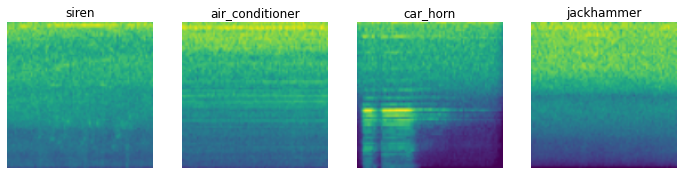

In [4]:
dls = dblock.dataloaders(DATA)
dls.valid.show_batch(max_n=4, nrows=1)

In [5]:
dls.vocab

['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']

In [6]:
modelPath = Path('../models')
preTrained = load_learner(modelPath/'model_V2.pkl')

In [7]:
def get_model(model, pretrained=True):
    m = model
    return m

In [8]:
model = partial(get_model, model=preTrained.model)
m = model()
type(m)

torch.nn.modules.container.Sequential

In [9]:
learn = cnn_learner(dls, model, pretrained=True, metrics=[error_rate, accuracy])

In [10]:
learn.freeze()

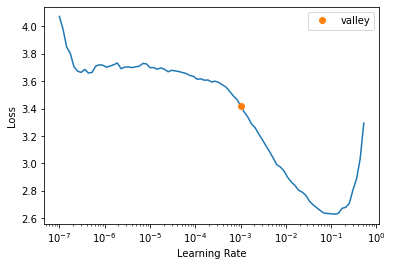

In [11]:
lr = learn.lr_find()

In [12]:
learn.fit_one_cycle(5, lr_max=slice(lr.valley))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.268661,2.797312,0.814978,0.185022,00:01
1,2.427612,1.571557,0.431718,0.568282,00:01
2,2.045934,1.322159,0.405286,0.594714,00:01
3,1.848116,1.248226,0.392070,0.607930,00:01
4,1.691072,1.246027,0.383260,0.616740,00:01


In [13]:
learn.unfreeze()

In [14]:
learn.fit_one_cycle(8, lr_max=slice(lr.valley))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.337851,1.176864,0.370044,0.629956,00:02
1,1.335998,1.126585,0.365639,0.634361,00:02
2,1.210279,1.022970,0.317181,0.682819,00:01
3,1.119400,1.051217,0.312775,0.687225,00:01
4,1.016455,0.979188,0.308370,0.691630,00:01
5,0.951902,0.865578,0.268722,0.731278,00:01
6,0.902861,0.852792,0.273128,0.726872,00:02
7,0.852757,0.847983,0.268722,0.731278,00:02


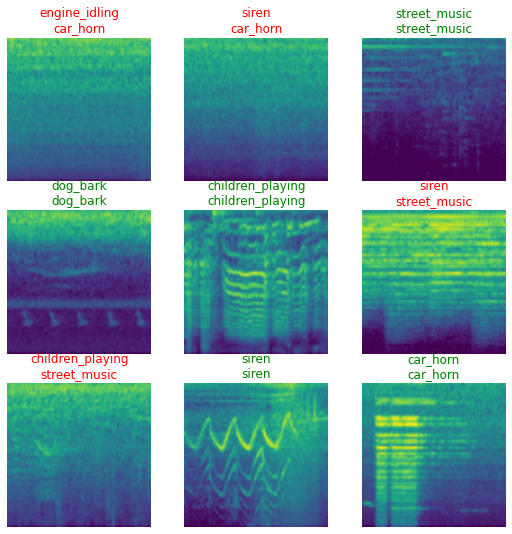

In [15]:
learn.show_results()

In [16]:
interp = Interpretation.from_learner(learn)

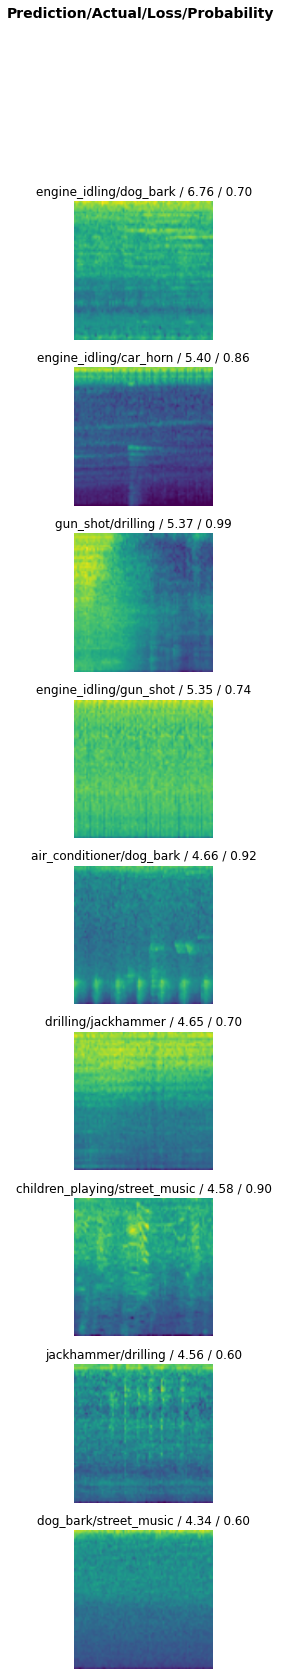

In [17]:
top_losses = interp.plot_top_losses(9,nrows=9)

```
losses,idxs = interp.top_losses(9)
top_losses = [(dls.valid_ds.items[x]) for x in idxs]
for x in top_losses:
    filename = Path(x.name.split(".")[0])
    directory = URBAN_SOUND_RECORDINGS / x.parent.name
    for file in os.listdir(directory):
        if str(filename) in file:
            print(f'{x.parent.name}')
            #display(Audio(directory/file))
            ```

In [18]:
a = ClassificationInterpretation.from_learner(learn)

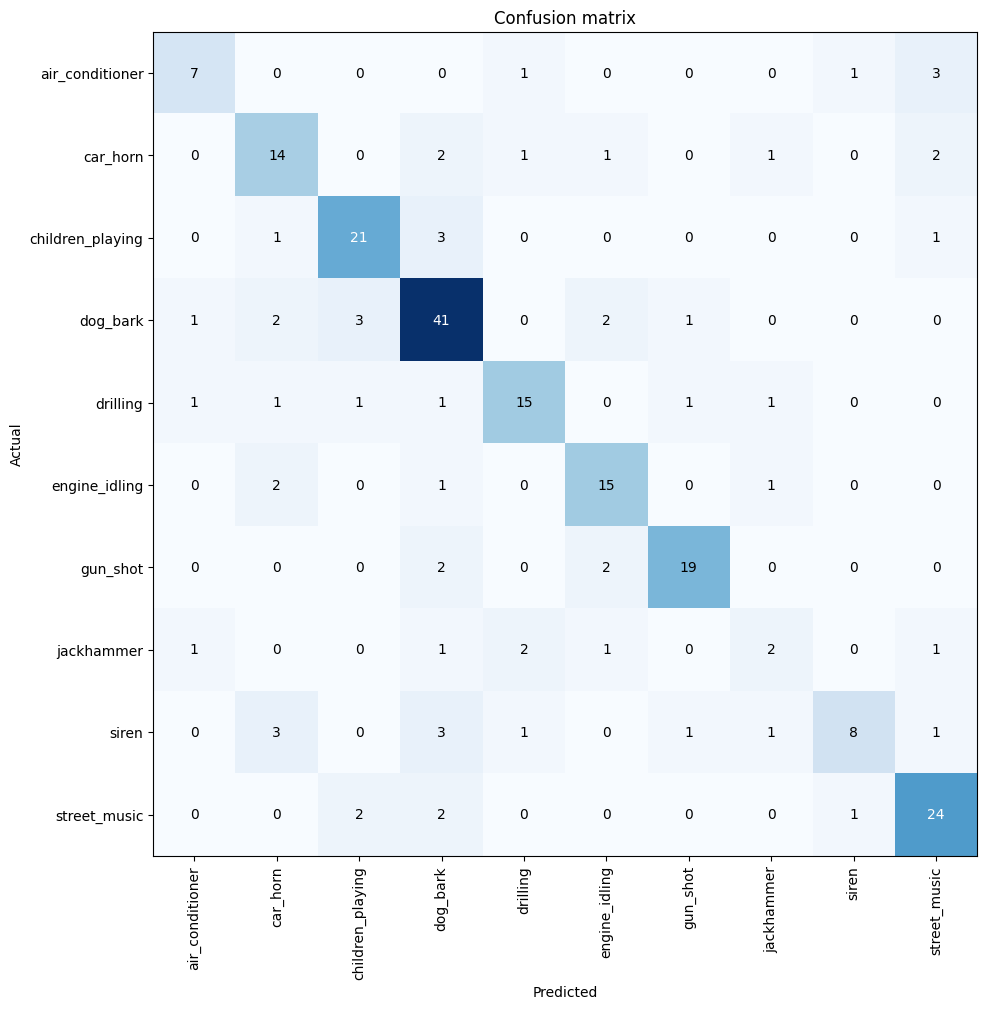

In [19]:
a.plot_confusion_matrix(figsize=(10,10), dpi = 100)